In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


## Initialize Reward

In [2]:
grid_size = 10
rewards = []
# initialize Reward function
for i in range(grid_size): 
        curr_row = [(float(grid_size-i)) for j in range(grid_size)]
        rewards.append(curr_row)
rewards = np.array(rewards)
gamma = 1 # discounting rate
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]] # down, up, right, left 
num_iterations = 1000

## Utilities

In [3]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminal_states:
        return initialPosition, 0

    curr_reward = rewards[initialPosition[0], initialPosition[1]]
    
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or grid_size in finalPosition: # if the final position is out of bounds
        finalPosition = initialPosition
        
    return finalPosition, curr_reward

In [4]:
value_map = np.zeros((grid_size, grid_size))
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

## Policy Evaluation

In [10]:
deltas = []
# this is a O(num_iterations*m*n^2) algorithm, 
for it in range(num_iterations):
    copyValueMap = np.copy(value_map)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*value_map[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    value_map = copyValueMap
    if it in [0,1,2,9, 99, num_iterations-100, num_iterations-1]:
        print("Iteration {}".format(it+1))
        print(value_map)
        print("")

Iteration 1
[[   0.          587.82296514  928.27233419 1147.30664805 1296.11974787
  1399.13194624 1469.83368072 1516.58160271 1544.86097583 1558.14272311]
 [ 569.82296514  795.30290691 1009.85674249 1177.73864395 1302.16007225
  1391.70189183 1454.06082325 1495.33264721 1520.14663001 1531.71508979]
 [ 878.27233419  977.85674249 1102.30099688 1215.85092395 1307.32374136
  1375.71579074 1423.64821219 1454.82262403 1472.96364115 1481.14394459]
 [1055.30664805 1103.73864395 1173.85092395 1244.27320809 1303.81847723
  1348.45256633 1378.26580972 1395.62387943 1404.02245714 1407.03559844]
 [1156.11974787 1180.16007226 1217.32374136 1255.81847723 1287.48124565
  1308.27492568 1317.60825162 1317.65682584 1312.73984849 1308.21372364]
 [1209.13194624 1219.70189184 1235.71579074 1250.45256633 1258.27492568
  1255.82209868 1242.50018329 1220.91857256 1197.32745249 1181.1252057 ]
 [1231.83368072 1234.06082325 1235.64821219 1232.26580973 1219.60825162
  1194.50018329 1155.90866282 1106.44012735 10

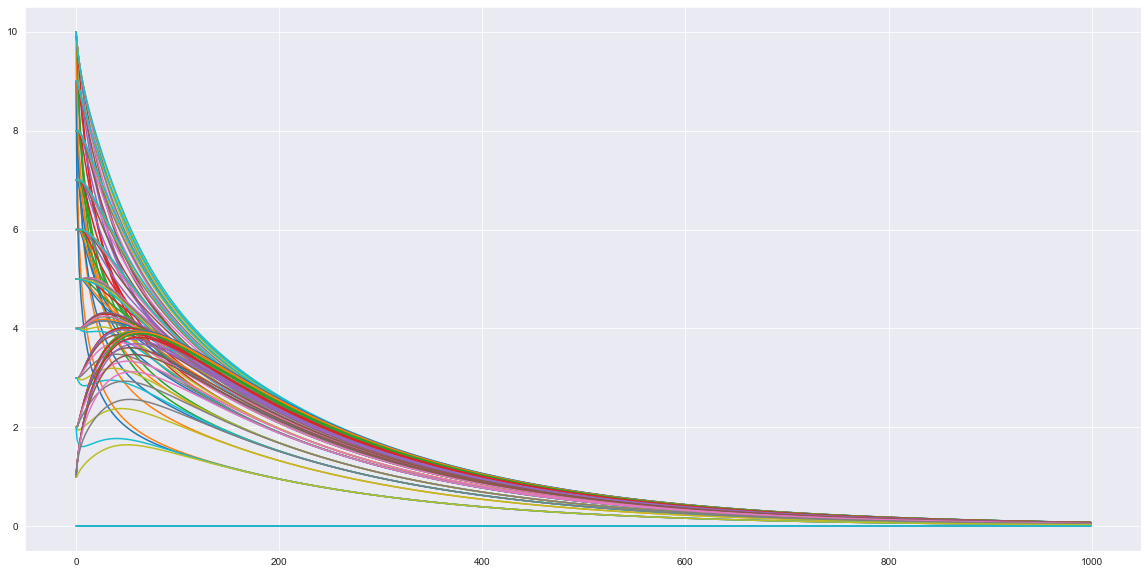

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)

## Finding Optimal Policy

In [7]:
def is_valid_coordinate(coord):
    i, j = coord[0], coord[1]
    return i >= 0 and i < grid_size and j >= 0 and j < grid_size

In [8]:
print(value_map)

[[   0.          587.79625967  928.22980633 1147.25371663 1296.05962411
  1399.06678534 1469.76504222 1516.51066256 1544.78864632 1558.06974292]
 [ 569.79625967  795.26579456 1009.80955414 1177.68344514 1302.0988654
  1391.63633329 1453.99223274 1495.26205975 1520.07485154 1531.64276028]
 [ 878.22980634  977.80955414 1102.24792394 1215.79243961 1307.26088647
  1375.64968385 1423.57985772 1454.75284199 1472.89305369 1481.07300444]
 [1055.25371663 1103.68344514 1173.79243961 1244.21144023 1303.75397656
  1348.38608545 1378.19809017 1395.55552497 1403.95386663 1406.96695994]
 [1156.05962411 1180.09886541 1217.26088647 1255.75397656 1287.41549675
  1308.20851474 1317.54177075 1317.59071895 1312.67428995 1308.14856274]
 [1209.06678534 1219.6363333  1235.64968385 1250.38608546 1258.20851474
  1255.75634978 1242.43568263 1220.85571767 1197.26624564 1181.06508194]
 [1231.76504222 1233.99223274 1235.57985773 1232.19809017 1219.54177075
  1194.43568263 1155.84689497 1106.38164302 1054.71472038 1

In [11]:
action_map = []
dirs = ["down", "up", "right", "left"]
for i in range(grid_size):
    curr_action = []
    for j in range(grid_size):
        direction = 0 # 0 : down, 1 : up, 2 : right, 3: left
        max_val = float("-inf")
        for k in range(len(actions)):
            action = actions[k]
            coord = np.array([i, j]) + np.array(action)
            if (is_valid_coordinate(coord)):
                curr_val = value_map[coord[0], coord[1]]
                if (curr_val > max_val):
                    direction = k 
                    max_val = curr_val
#                 elif (curr_val == max_val):
#                     direction += k
#         curr_action.append(dirs[direction])
        curr_action.append(direction)
    action_map.append(curr_action)
    
action_map = np.array(action_map)
print(action_map)    

[[2 2 2 2 2 2 2 2 2 3]
 [1 2 2 2 2 2 2 2 0 0]
 [1 1 2 2 2 2 2 0 0 0]
 [1 1 2 2 2 2 0 0 0 0]
 [1 1 2 2 2 0 0 0 0 0]
 [1 2 2 2 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0]
 [2 3 0 0 0 0 0 0 0 0]
 [0 0 3 3 3 3 3 3 0 0]
 [0 3 3 3 3 3 3 3 3 0]]
